In [2]:
import pandas as pd
sheets_dict = pd.read_excel('E8_topic_A__Students_characteristics.xlsx',sheet_name=None)
gender_df = sheets_dict['sex_s']

In [3]:
#shorten 'indicator item' values

'''
M = Male
F = Female
Other = Other
none = Prefer not to assign myself to the categories offered
'''

gender_df['Unnamed: 9'] = gender_df['Unnamed: 9'].astype('string')
for i in range(0,len(gender_df)):
    current_object =gender_df.at[i,'Unnamed: 9']
    if pd.isna(current_object):
        gender_df.loc[i,'Unnamed: 9'] = 'nan'
        continue
    if current_object=='Female':
        gender_df.loc[i,'Unnamed: 9'] = 'F'
    elif current_object=='Male':
        gender_df.loc[i,'Unnamed: 9'] = 'M'
    elif current_object=='Prefer not to assign myself to the categories offered':
        gender_df.loc[i,'Unnamed: 9'] = 'none'
        
#rename weird columns
gender_df.rename(columns={gender_df.columns[3]:'Unnamed: 3'},inplace=True)

#delete empty rows and columns
gender_df = gender_df.iloc[2:].reset_index(drop=True)
gender_df = gender_df.dropna(axis=1,how='all')
gender_df = gender_df.dropna(axis=0,how='all')

#add row for later column names
gender_df['column_names']=gender_df.apply(lambda row: f"{row['Unnamed: 3']}, {row['Unnamed: 5']}, {row['Unnamed: 9']}",axis=1).astype('string')

#turn df
gender_df = gender_df.T.reset_index(drop=True)

#rename columns
for i in range (0,len(gender_df.columns)):
    gender_df.rename(columns={gender_df.columns[i]:gender_df.iloc[34,i]},inplace=True)
    
#delete useless rows and columns
gender_df = gender_df.drop(34).reset_index(drop=True) #last row
gender_df = gender_df.iloc[9:].reset_index(drop=True) #first 8 rows
gender_df = gender_df.drop(['nan, nan, nan'], axis=1).reset_index(drop=True)

#rename first column
gender_df.rename(columns={gender_df.columns[0]:'country'},inplace=True)

#change all datatypes if column has numeric values
for col in gender_df.columns:
    if pd.to_numeric(gender_df[col], errors='coerce').notna().all():
        gender_df[col] = gender_df[col].astype(float)

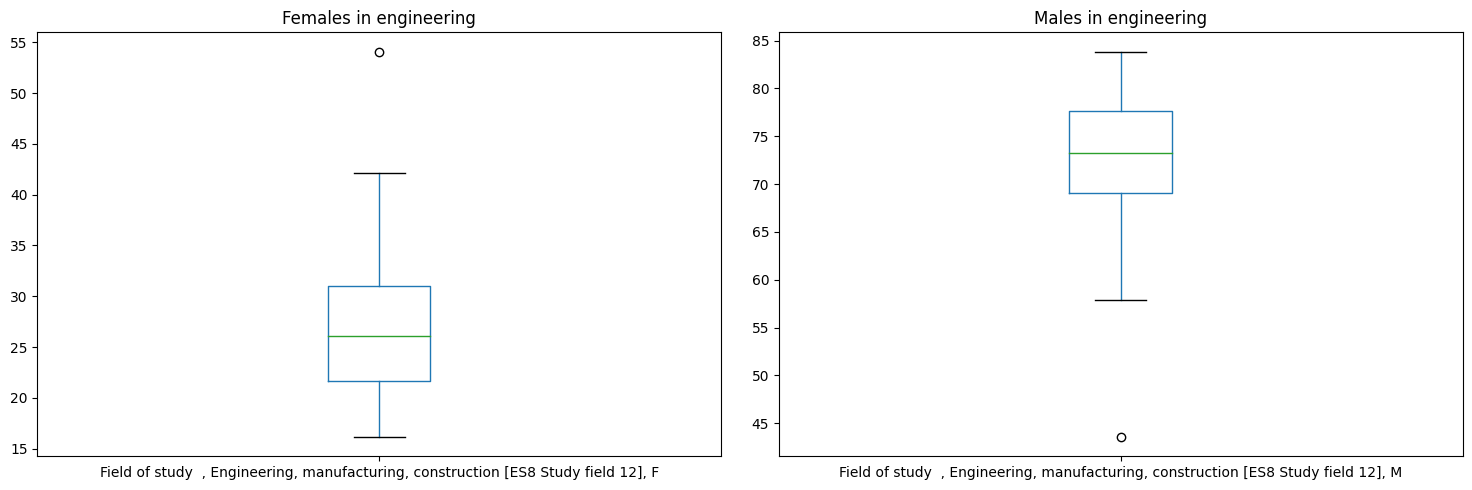

In [4]:
#boxplots
import matplotlib.pyplot as plt

# Create a figure and axes for the three boxplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot each boxplot on its respective axis
gender_df.boxplot(column='Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], F', ax=axes[0], grid=False)
axes[0].set_title('Females in engineering')

gender_df.boxplot(column='Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], M', ax=axes[1], grid=False)
axes[1].set_title('Males in engineering')

# Show the plots
plt.tight_layout()
plt.show()

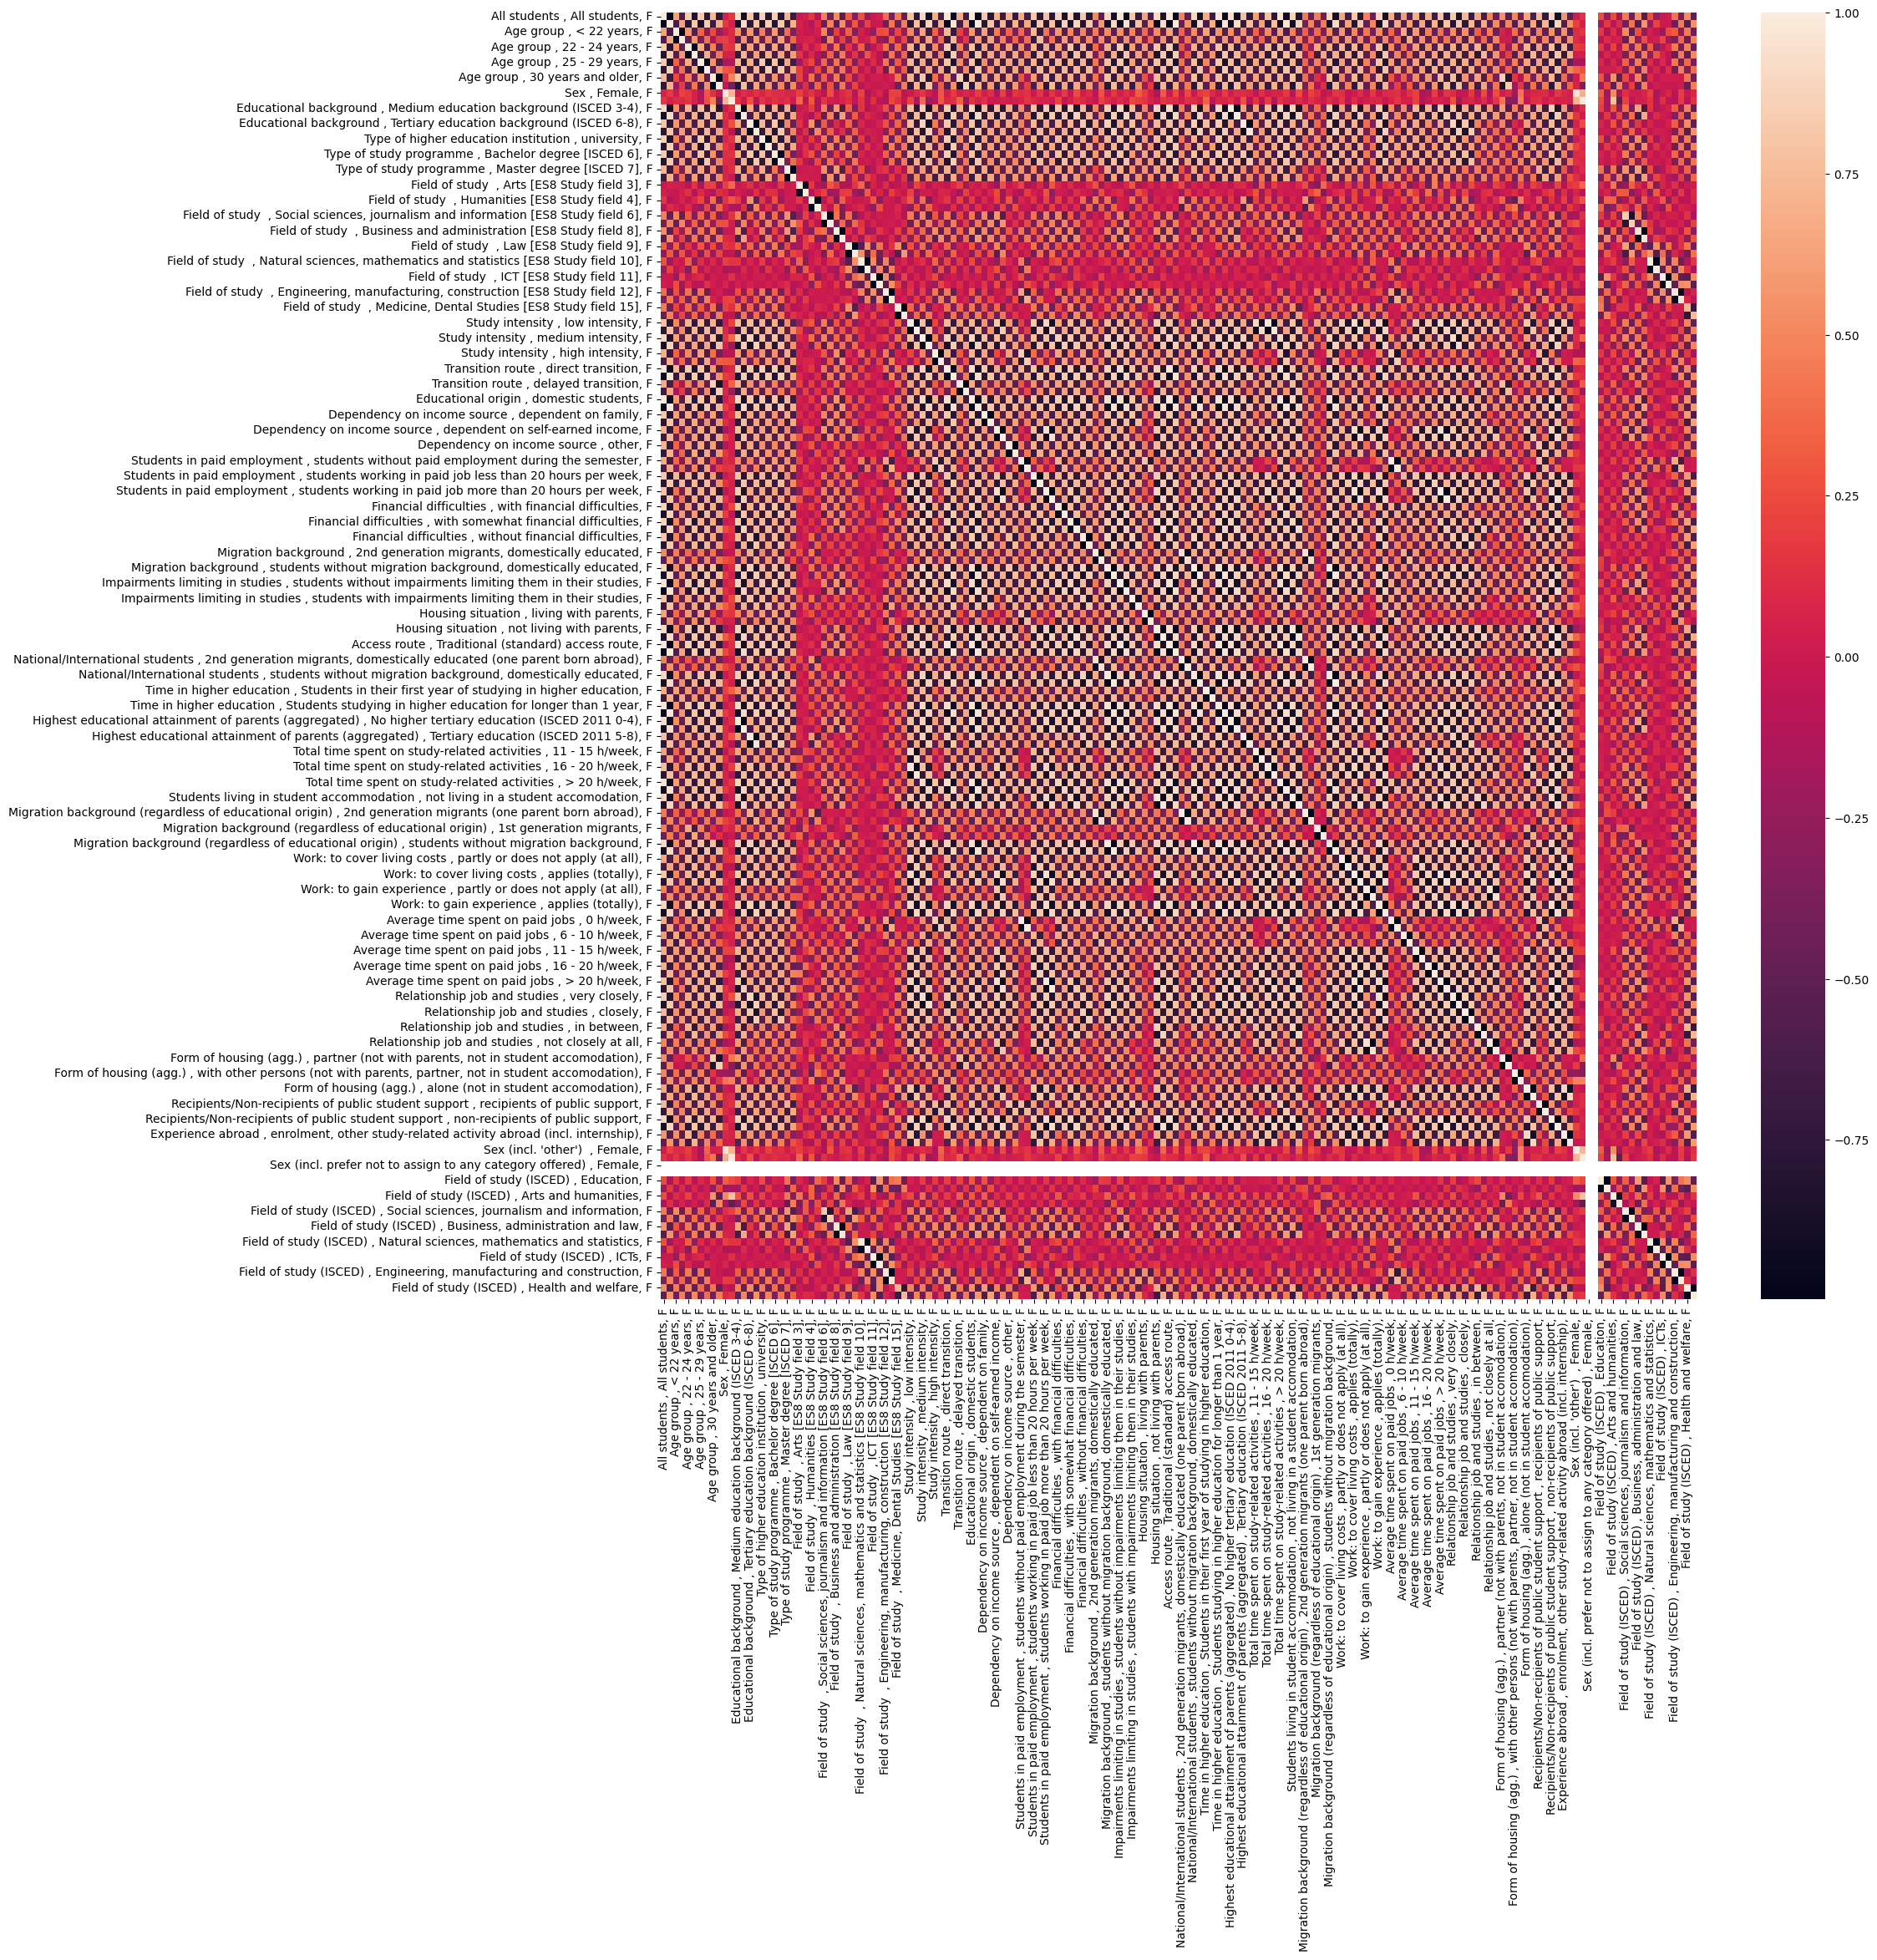

In [6]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(gender_df.select_dtypes(include=['number']).corr());